In [1]:
# This notebook is for visualizing selected receptors of neuromaps

# Includes:
#  Selected neuromaps - M1, nAchRs, FEOBVs
#  fetching the neuromaps
#  transofrming the maps to surface space
#  tresholding the maps for comparasion with gradients (on another notebook)
#  Visualizing the maps

In [2]:
from neuromaps import datasets
from neuromaps import images
from neuromaps import stats
from neuromaps.datasets import available_annotations
from neuromaps.datasets import available_tags
from neuromaps.datasets import fetch_annotation
import nibabel as nib
from nilearn.plotting import plot_glass_brain
import pandas as pd
from neuromaps import transforms, plotting
import numpy as np
from brainspace.datasets import load_conte69, load_fsa5
from brainspace.plotting import plot_hemispheres
from neuromaps.datasets import fetch_fslr
from surfplot import Plot

### Setting path

In [3]:
note_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/notebook/"
data_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/data/"
results_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/Neuromaps/"
fig_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/figures/Neuromaps/"

### Fetch the data

In [4]:
# Receptors to fetch
Aghourian_FEOBV = datasets.fetch_annotation(source='aghourian2017', desc='feobv')
print(Aghourian_FEOBV)
Bedard_FEOBV = datasets.fetch_annotation(source='bedard2019', desc='feobv')
print(Bedard_FEOBV)
Tuominen_FEOBV = datasets.fetch_annotation(source='tuominen', desc='feobv')
print(Tuominen_FEOBV)
M1 = datasets.fetch_annotation(desc='lsn3172176')
print(M1)
nAchRs = datasets.fetch_annotation(desc='flubatine')
print(nAchRs)

/home/ROBARTS/schakraborty/neuromaps-data/annotations/aghourian2017/feobv/MNI152/source-aghourian2017_desc-feobv_space-MNI152_res-1mm_feature.nii.gz
/home/ROBARTS/schakraborty/neuromaps-data/annotations/bedard2019/feobv/MNI152/source-bedard2019_desc-feobv_space-MNI152_res-1mm_feature.nii.gz
/home/ROBARTS/schakraborty/neuromaps-data/annotations/tuominen/feobv/MNI152/source-tuominen_desc-feobv_space-MNI152_res-2mm_feature.nii.gz
/home/ROBARTS/schakraborty/neuromaps-data/annotations/naganawa2020/lsn3172176/MNI152/source-naganawa2020_desc-lsn3172176_space-MNI152_res-1mm_feature.nii.gz
/home/ROBARTS/schakraborty/neuromaps-data/annotations/hillmer2016/flubatine/MNI152/source-hillmer2016_desc-flubatine_space-MNI152_res-1mm_feature.nii.gz


### Visualize on MNI space with glass brain

(193, 229, 193)


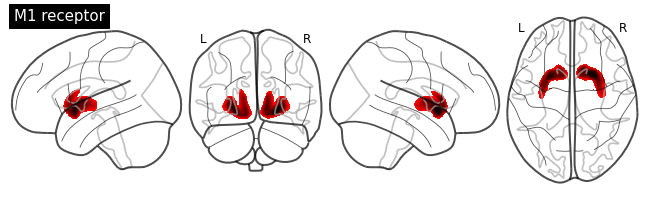

In [5]:
# Visualize on MNI space
# specify file
file = M1
filename = 'M1'

nii = nib.load(file)
data = nii.get_fdata()
print(data.shape)
plot_glass_brain(nii, title=str(filename)+' receptor', display_mode='lyrz', threshold=6)

### Transform to cortical space (fsLR and fsa5)

In [6]:
Aghourian_FEOBV_fslr = transforms.mni152_to_fslr(Aghourian_FEOBV, '32k')
Bedard_FEOBV_fslr = transforms.mni152_to_fslr(Bedard_FEOBV, '32k')
Tuominen_FEOBV_fslr = transforms.mni152_to_fslr(Tuominen_FEOBV, '32k')
M1_fslr = transforms.mni152_to_fslr(M1, '32k')
nAchRs_fslr = transforms.mni152_to_fslr(nAchRs, '32k')

In [7]:
Aghourian_FEOBV_fsa = transforms.mni152_to_fsaverage(Aghourian_FEOBV, '10k')
Bedard_FEOBV_fsa = transforms.mni152_to_fsaverage(Bedard_FEOBV, '10k')
Tuominen_FEOBV_fsa = transforms.mni152_to_fsaverage(Tuominen_FEOBV, '10k')
M1_fsa = transforms.mni152_to_fsaverage(M1, '10k')
nAchRs_fsa = transforms.mni152_to_fsaverage(nAchRs, '10k')

In [8]:
receptors_fslr = [Aghourian_FEOBV_fslr, Bedard_FEOBV_fslr, Tuominen_FEOBV_fslr, M1_fslr, nAchRs_fslr]
receptors_fsa = [Aghourian_FEOBV_fsa, Bedard_FEOBV_fsa, Tuominen_FEOBV_fsa, M1_fsa, nAchRs_fsa]

In [9]:
Aghourian_FEOBV_fslr_lh, Aghourian_FEOBV_fslr_rh = Aghourian_FEOBV_fslr
Aghourian_FEOBV_fslr_lh_data = Aghourian_FEOBV_fslr_lh.agg_data()
Aghourian_FEOBV_fslr_rh_data = Aghourian_FEOBV_fslr_rh.agg_data()
Aghourian_FEOBV_fslr_data = np.concatenate((Aghourian_FEOBV_fslr_lh_data, Aghourian_FEOBV_fslr_rh_data))

In [10]:
Bedard_FEOBV_fslr_lh, Bedard_FEOBV_fslr_rh = Bedard_FEOBV_fslr
Bedard_FEOBV_fslr_lh_data = Bedard_FEOBV_fslr_lh.agg_data()
Bedard_FEOBV_fslr_rh_data = Bedard_FEOBV_fslr_rh.agg_data()
Bedard_FEOBV_fslr_data = np.concatenate((Bedard_FEOBV_fslr_lh_data, Bedard_FEOBV_fslr_rh_data))

In [11]:
Tuominen_FEOBV_fslr_lh, Tuominen_FEOBV_fslr_rh = Tuominen_FEOBV_fslr
Tuominen_FEOBV_fslr_lh_data = Tuominen_FEOBV_fslr_lh.agg_data()
Tuominen_FEOBV_fslr_rh_data = Tuominen_FEOBV_fslr_rh.agg_data()
Tuominen_FEOBV_fslr_data = np.concatenate((Tuominen_FEOBV_fslr_lh_data, Tuominen_FEOBV_fslr_rh_data))

In [12]:
M1_fslr_lh, M1_fslr_rh = M1_fslr
M1_fslr_lh_data = M1_fslr_lh.agg_data()
M1_fslr_rh_data = M1_fslr_rh.agg_data()
M1_fslr_data = np.concatenate((M1_fslr_lh_data, M1_fslr_rh_data))

In [13]:
nAchRs_fslr_lh, nAchRs_fslr_rh = nAchRs_fslr
nAchRs_fslr_lh_data = nAchRs_fslr_lh.agg_data()
nAchRs_fslr_rh_data = nAchRs_fslr_rh.agg_data()
nAchRs_fslr_data = np.concatenate((nAchRs_fslr_lh_data, nAchRs_fslr_rh_data))

### Visualize on cortical surface

/home/ROBARTS/schakraborty/venv/lib/python3.9/site-packages/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


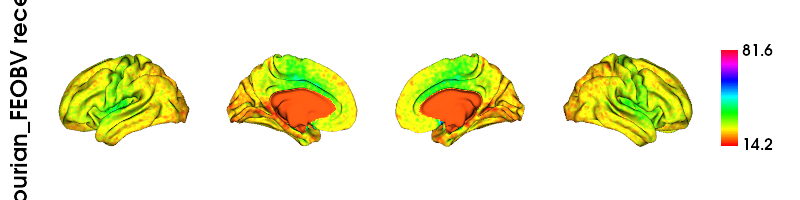

In [14]:
# Brainspace visualize 
surf_lh, surf_rh = load_conte69()
plot_hemispheres(surf_lh, surf_rh, array_name=[Aghourian_FEOBV_fslr_data], size=(800, 200),
                cmap=['hsv'], color_bar=True, embed_nb=True, label_text=['Aghourian_FEOBV receptor'] )

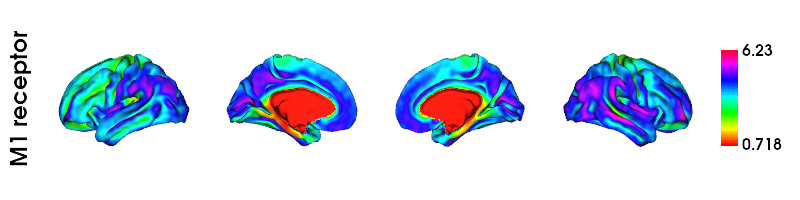

In [15]:
# Brainspace visualize 
surf_lh, surf_rh = load_conte69()

plot_hemispheres(surf_lh, surf_rh, array_name=[M1_fslr_data], size=(800, 200),
                cmap=['hsv'], color_bar=True, embed_nb=True, label_text=['M1 receptor'] )

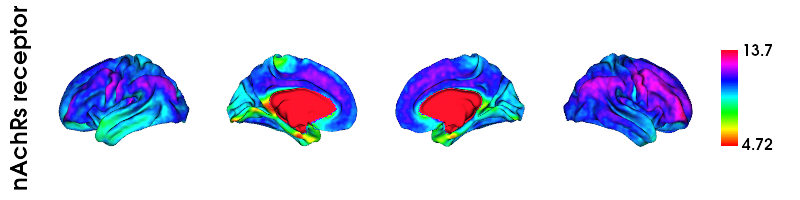

In [16]:
# Brainspace visualize 
surf_lh, surf_rh = load_conte69()
plot_hemispheres(surf_lh, surf_rh, array_name=[nAchRs_fslr_data], size=(800, 200),
                cmap=['hsv'], color_bar=True, embed_nb=True, label_text=['nAchRs receptor'] )

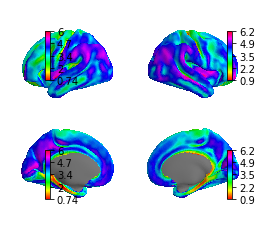

In [17]:
# Neuromap visualization 
plotting.plot_surf_template(M1_fslr, 'fsLR', '32k', cmap='hsv', colorbar=True, output_file=(fig_path + f'Neuromap_M1_fsLR-32k.png'))

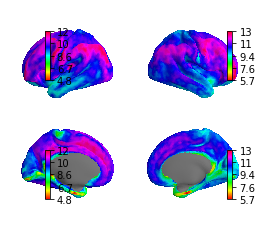

In [50]:
plotting.plot_surf_template(nAchRs_fslr, 'fsLR', '32k', cmap='hsv', colorbar=True, output_file=(fig_path + f'Neuromap_nAchRs_fsLR-32k.png'))

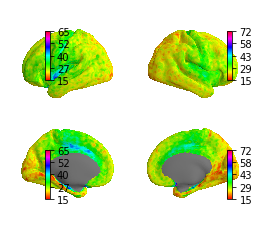

In [51]:
plotting.plot_surf_template(Aghourian_FEOBV_fslr, 'fsLR', '32k', cmap='hsv', colorbar=True, output_file=(fig_path + f'Neuromap_Aghourian_FEOBV_fsLR-32k.png'))

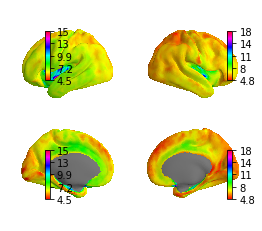

In [54]:
plotting.plot_surf_template(Bedard_FEOBV_fslr, 'fsLR', '32k', cmap='hsv', colorbar=True, output_file=(fig_path + f'Neuromap_Bedard_FEOBV_fsLR-32k.png'))

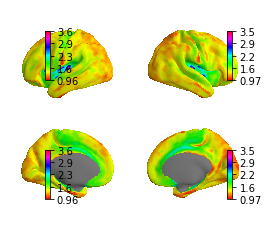

In [52]:
plotting.plot_surf_template(Tuominen_FEOBV_fslr, 'fsLR', '32k', cmap='hsv', colorbar=True, output_file=(fig_path + f'Neuromap_Tuominen_FEOBV_fsLR-32k.png'))

In [18]:
# Visualize with surfplot
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']
med_lh, med_rh = surfaces['medial']
# get medial wall gifti - array for masking the data
med_lh_img = images.load_gifti(med_lh)
med_lh_data = med_lh_img.agg_data()
med_rh_img = images.load_gifti(med_rh)
med_rh_data = med_rh_img.agg_data()

/tmp/ipykernel_48557/3300654706.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


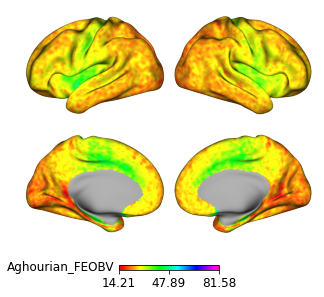

In [19]:
# mask the medial wall first 
Aghourian_FEOBV_fslr_lh_data[np.logical_not(med_lh_data)] = 0
Aghourian_FEOBV_fslr_rh_data[np.logical_not(med_rh_data)] = 0

# now plot the data
p = Plot(surf_lh=lh, surf_rh=rh)
p.add_layer({'left': Aghourian_FEOBV_fslr_lh_data, 'right': Aghourian_FEOBV_fslr_rh_data}, cmap='gist_rainbow', cbar_label='Aghourian_FEOBV')
kws = {'fontsize': 12}
fig = p.build(cbar_kws=kws)
fig.show()
fig.savefig(fig_path+'Aghourian_FEOBV_receptor.png', dpi=300)

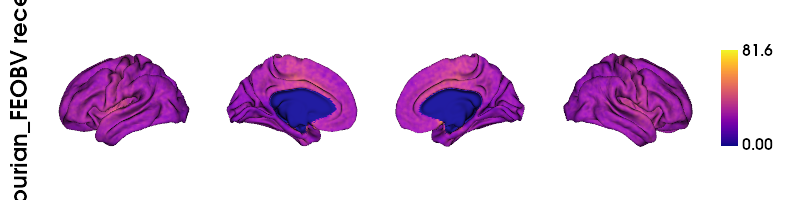

In [80]:
# mask the medial wall first 
Aghourian_FEOBV_fslr_lh_data[np.logical_not(med_lh_data)] = 0
Aghourian_FEOBV_fslr_rh_data[np.logical_not(med_rh_data)] = 0

Aghourian_FEOBV_fslr_nmed_data = np.concatenate((Aghourian_FEOBV_fslr_lh_data, Aghourian_FEOBV_fslr_rh_data))
# Brainspace visualize 
surf_lh, surf_rh = load_conte69()
plot_hemispheres(surf_lh, surf_rh, array_name=[Aghourian_FEOBV_fslr_nmed_data], size=(800, 200),
                cmap=['plasma'], color_bar=True, embed_nb=True, label_text=['Aghourian_FEOBV receptor'] )

/tmp/ipykernel_93824/414285678.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


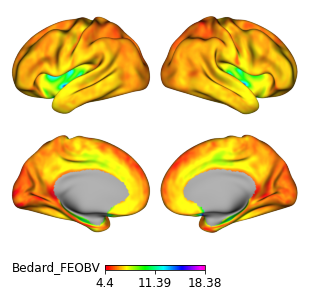

In [118]:
# mask the medial wall first 
Bedard_FEOBV_fslr_lh_data[np.logical_not(med_lh_data)] = 0
Bedard_FEOBV_fslr_rh_data[np.logical_not(med_rh_data)] = 0

# now plot the data
p = Plot(surf_lh=lh, surf_rh=rh)
p.add_layer({'left': Bedard_FEOBV_fslr_lh_data, 'right': Bedard_FEOBV_fslr_rh_data}, cmap='gist_rainbow', cbar_label='Bedard_FEOBV')
kws = {'fontsize': 12}
fig = p.build(cbar_kws=kws)
fig.show()
fig.savefig(fig_path+'Bedard_FEOBV_receptor.png', dpi=300)

/tmp/ipykernel_93824/294714707.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


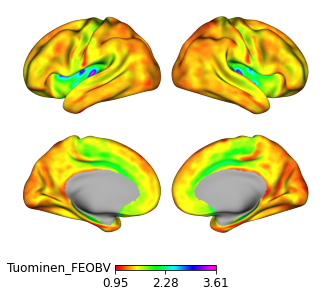

In [116]:
# mask the medial wall first 
Tuominen_FEOBV_fslr_lh_data[np.logical_not(med_lh_data)] = 0
Tuominen_FEOBV_fslr_rh_data[np.logical_not(med_rh_data)] = 0

# now plot the data
p = Plot(surf_lh=lh, surf_rh=rh)
p.add_layer({'left': Tuominen_FEOBV_fslr_lh_data, 'right': Tuominen_FEOBV_fslr_rh_data}, cmap='gist_rainbow', cbar_label='Tuominen_FEOBV')
kws = {'fontsize': 12}
fig = p.build(cbar_kws=kws)
fig.show()
fig.savefig(fig_path+'Tuominen_FEOBV_receptor.png', dpi=300)

/tmp/ipykernel_93824/601244069.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


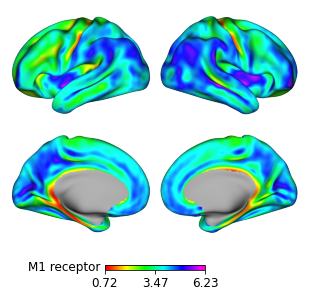

In [119]:
# mask the medial wall first 
M1_fslr_lh_data[np.logical_not(med_lh_data)] = 0
M1_fslr_rh_data[np.logical_not(med_rh_data)] = 0

# now plot the data
p = Plot(surf_lh=lh, surf_rh=rh)
p.add_layer({'left': M1_fslr_lh_data, 'right': M1_fslr_rh_data}, cmap='gist_rainbow', cbar_label='M1 receptor')
kws = {'fontsize': 12}
fig = p.build(cbar_kws=kws)
fig.show()
fig.savefig(fig_path+'M1_receptor.png', dpi=300)

/tmp/ipykernel_93824/561240749.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


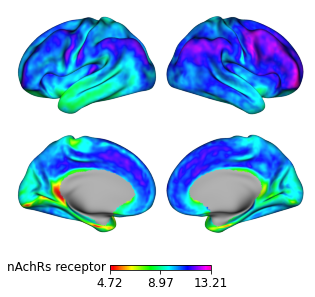

In [120]:
# mask the medial wall first 
nAchRs_fslr_lh_data[np.logical_not(med_lh_data)] = 0
nAchRs_fslr_rh_data[np.logical_not(med_rh_data)] = 0

# now plot the data
p = Plot(surf_lh=lh, surf_rh=rh)
p.add_layer({'left': nAchRs_fslr_lh_data, 'right': nAchRs_fslr_rh_data}, cmap='gist_rainbow', cbar_label='nAchRs receptor')
kws = {'fontsize': 12}
fig = p.build(cbar_kws=kws)
fig.show()
fig.savefig(fig_path+'nAchRs_receptor.png', dpi=300)

### Tresholding the receptor data arrays

In [122]:
# Set quantile
q = 0.75

In [123]:
# Aghourian_FEOBV
treshold = np.quantile(Aghourian_FEOBV_fslr_data, q)
Aghourian_FEOBV_fslr_tr_data = np.where(Aghourian_FEOBV_fslr_data >= treshold, Aghourian_FEOBV_fslr_data, 0)
np.count_nonzero(Aghourian_FEOBV_fslr_tr_data)
treshold

28.795607089996338

In [124]:
# Bedard_FEOBV
treshold = np.quantile(Bedard_FEOBV_fslr_data, q)
Bedard_FEOBV_fslr_tr_data = np.where(Bedard_FEOBV_fslr_data >= treshold, Bedard_FEOBV_fslr_data, 0)
np.count_nonzero(Bedard_FEOBV_fslr_tr_data)
treshold

6.865616083145142

In [125]:
# Tuominen_FEOBV
treshold = np.quantile(Tuominen_FEOBV_fslr_data, q)
Tuominen_FEOBV_fslr_tr_data = np.where(Tuominen_FEOBV_fslr_data >= treshold, Tuominen_FEOBV_fslr_data, 0)
np.count_nonzero(Tuominen_FEOBV_fslr_tr_data)
treshold

1.6296193599700928

In [126]:
# M1
treshold = np.quantile(M1_fslr_data, q)
M1_fslr_tr_data = np.where(M1_fslr_data >= treshold, M1_fslr_data, 0)
np.count_nonzero(M1_fslr_tr_data)
treshold

4.325129389762878

In [127]:
# nAchRs
treshold = np.quantile(nAchRs_fslr_data, q)
nAchRs_fslr_tr_data = np.where(nAchRs_fslr_data >= treshold, nAchRs_fslr_data, 0)
np.count_nonzero(nAchRs_fslr_tr_data)
treshold

11.186496496200562

In [131]:
# Save the tresholded arrays
pd.DataFrame(Aghourian_FEOBV_fslr_tr_data).to_csv(results_path + 'Aghourian_FEOBV_fslr_tr25_data.csv', index=False)
pd.DataFrame(Bedard_FEOBV_fslr_tr_data).to_csv(results_path + 'Bedard_FEOBV_fslr_tr25_data.csv', index=False)
pd.DataFrame(Tuominen_FEOBV_fslr_tr_data).to_csv(results_path + 'Tuominen_FEOBV_fslr_tr25_data.csv', index=False)
pd.DataFrame(M1_fslr_tr_data).to_csv(results_path + 'M1_fslr_tr25_data.csv', index=False)
pd.DataFrame(nAchRs_fslr_tr_data).to_csv(results_path + 'nAchRs_fslr_tr25_data.csv', index=False)

In [132]:
tr_receptors_fslr = [Aghourian_FEOBV_fslr_tr_data, Bedard_FEOBV_fslr_tr_data, Tuominen_FEOBV_fslr_tr_data, M1_fslr_tr_data, nAchRs_fslr_tr_data]
receptor_names = ['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs']

for r in range(0, len(tr_receptors_fslr)):
    gii_L = nib.gifti.GiftiImage()
    gii_L.add_gifti_data_array(
        nib.gifti.GiftiDataArray(tr_receptors_fslr[r][:32492].astype(np.float32))) # For left hemisphere
    nib.save(gii_L, results_path+'Receptor-'+receptor_names[r]+'_Treshold25%_L_fsLR-32k.gii')

for r in range(0, len(tr_receptors_fslr)):
    gii_R = nib.gifti.GiftiImage()
    gii_R.add_gifti_data_array(
        nib.gifti.GiftiDataArray(tr_receptors_fslr[r][32492:].astype(np.float32))) # right hemisphere is [32492:]
    nib.save(gii_R, results_path+'Receptor-'+receptor_names[r]+'_Treshold25%_R_fsLR-32k.gii')

### Visualize Tresholded receptor data

In [133]:
# Setting up to Visualize with surfplot
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']
med_lh, med_rh = surfaces['medial']

# get medial wall gifti - array for masking the data
med_lh_img = images.load_gifti(med_lh)
med_lh_data = med_lh_img.agg_data()
med_rh_img = images.load_gifti(med_rh)
med_rh_data = med_rh_img.agg_data()

In [42]:
# Load the tresholded data
Tr_Aghourian_FEOBV_fslr_L = images.load_gifti(results_path+'Receptor-Aghourian_FEOBV_Treshold25%_L_fsLR-32k.gii')
Tr_Aghourian_FEOBV_fslr_R = images.load_gifti(results_path+'Receptor-Aghourian_FEOBV_Treshold25%_R_fsLR-32k.gii')
Tr_Aghourian_FEOBV_fslr_L_data = Tr_Aghourian_FEOBV_fslr_L.agg_data()
Tr_Aghourian_FEOBV_fslr_R_data = Tr_Aghourian_FEOBV_fslr_R.agg_data()

Tr_Bedard_FEOBV_fslr_L = images.load_gifti(results_path+'Receptor-Bedard_FEOBV_Treshold25%_L_fsLR-32k.gii')
Tr_Bedard_FEOBV_fslr_R = images.load_gifti(results_path+'Receptor-Bedard_FEOBV_Treshold25%_R_fsLR-32k.gii')
Tr_Bedard_FEOBV_fslr_L_data = Tr_Bedard_FEOBV_fslr_L.agg_data()
Tr_Bedard_FEOBV_fslr_R_data = Tr_Bedard_FEOBV_fslr_R.agg_data()

Tr_Tuominen_FEOBV_fslr_L = images.load_gifti(results_path+'Receptor-Tuominen_FEOBV_Treshold25%_L_fsLR-32k.gii')
Tr_Tuominen_FEOBV_fslr_R = images.load_gifti(results_path+'Receptor-Tuominen_FEOBV_Treshold25%_R_fsLR-32k.gii')
Tr_Tuominen_FEOBV_fslr_L_data = Tr_Tuominen_FEOBV_fslr_L.agg_data()
Tr_Tuominen_FEOBV_fslr_R_data = Tr_Tuominen_FEOBV_fslr_R.agg_data()

Tr_M1_fslr_L = images.load_gifti(results_path+'Receptor-M1_Treshold25%_L_fsLR-32k.gii')
Tr_M1_fslr_R = images.load_gifti(results_path+'Receptor-M1_Treshold25%_R_fsLR-32k.gii')
Tr_M1_fslr_L_data = Tr_M1_fslr_L.agg_data()
Tr_M1_fslr_R_data = Tr_M1_fslr_R.agg_data()

Tr_nAchRs_fslr_L = images.load_gifti(results_path+'Receptor-nAchRs_Treshold25%_L_fsLR-32k.gii')
Tr_nAchRs_fslr_R = images.load_gifti(results_path+'Receptor-nAchRs_Treshold25%_R_fsLR-32k.gii')
Tr_nAchRs_fslr_L_data = Tr_nAchRs_fslr_L.agg_data()
Tr_nAchRs_fslr_R_data = Tr_nAchRs_fslr_R.agg_data()

/tmp/ipykernel_48557/3291498819.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


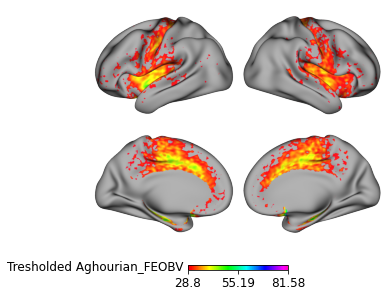

In [44]:
# mask the medial wall first 
Tr_Aghourian_FEOBV_fslr_L_data[np.logical_not(med_lh_data)] = 0
Tr_Aghourian_FEOBV_fslr_R_data[np.logical_not(med_rh_data)] = 0

# now plot the data
p = Plot(surf_lh=lh, surf_rh=rh)
p.add_layer({'left': Tr_Aghourian_FEOBV_fslr_L_data, 'right': Tr_Aghourian_FEOBV_fslr_R_data}, cmap='gist_rainbow', cbar_label='Tresholded Aghourian_FEOBV')
kws = {'fontsize': 12}
fig = p.build(cbar_kws=kws)
fig.show()
fig.savefig(fig_path+'Tresholded_Aghourian_FEOBV_receptor.png', dpi=300)

/tmp/ipykernel_48557/2661831109.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


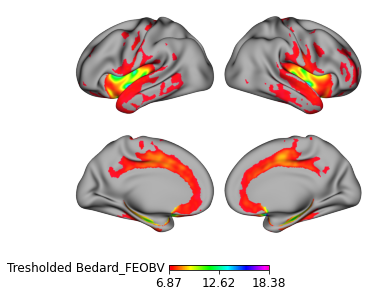

In [45]:
# mask the medial wall first 
Tr_Bedard_FEOBV_fslr_L_data[np.logical_not(med_lh_data)] = 0
Tr_Bedard_FEOBV_fslr_R_data[np.logical_not(med_rh_data)] = 0

# now plot the data
p = Plot(surf_lh=lh, surf_rh=rh)
p.add_layer({'left': Tr_Bedard_FEOBV_fslr_L_data, 'right': Tr_Bedard_FEOBV_fslr_R_data}, cmap='gist_rainbow', cbar_label='Tresholded Bedard_FEOBV')
kws = {'fontsize': 12}
fig = p.build(cbar_kws=kws)
fig.show()
fig.savefig(fig_path+'Tresholded_Bedard_FEOBV_receptor.png', dpi=300)

/tmp/ipykernel_48557/3709914877.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


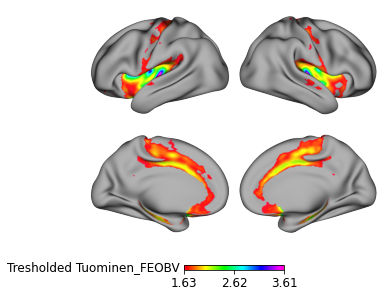

In [46]:
# mask the medial wall first 
Tr_Tuominen_FEOBV_fslr_L_data[np.logical_not(med_lh_data)] = 0
Tr_Tuominen_FEOBV_fslr_R_data[np.logical_not(med_rh_data)] = 0

# now plot the data
p = Plot(surf_lh=lh, surf_rh=rh)
p.add_layer({'left': Tr_Tuominen_FEOBV_fslr_L_data, 'right': Tr_Tuominen_FEOBV_fslr_R_data}, cmap='gist_rainbow', cbar_label='Tresholded Tuominen_FEOBV')
kws = {'fontsize': 12}
fig = p.build(cbar_kws=kws)
fig.show()
fig.savefig(fig_path+'Tresholded_Tuominen_FEOBV_receptor.png', dpi=300)

/tmp/ipykernel_48557/3560247918.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


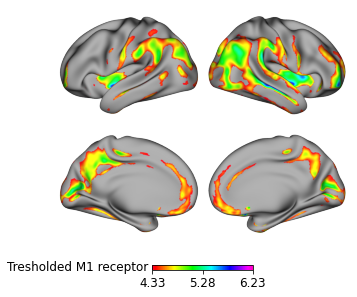

In [47]:
# mask the medial wall first 
Tr_M1_fslr_L_data[np.logical_not(med_lh_data)] = 0
Tr_M1_fslr_R_data[np.logical_not(med_rh_data)] = 0

# now plot the data
p = Plot(surf_lh=lh, surf_rh=rh)
p.add_layer({'left': Tr_M1_fslr_L_data, 'right': Tr_M1_fslr_R_data}, cmap='gist_rainbow', cbar_label='Tresholded M1 receptor')
kws = {'fontsize': 12}
fig = p.build(cbar_kws=kws)
fig.show()
fig.savefig(fig_path+'Tresholded_M1_receptor.png', dpi=300)

/tmp/ipykernel_48557/2894827669.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


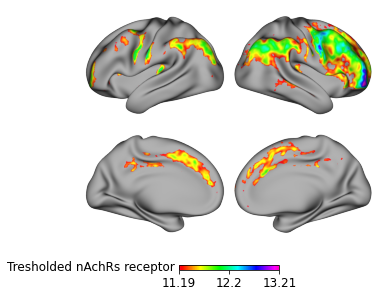

In [48]:
# mask the medial wall first 
Tr_nAchRs_fslr_L_data[np.logical_not(med_lh_data)] = 0
Tr_nAchRs_fslr_R_data[np.logical_not(med_rh_data)] = 0

# now plot the data
p = Plot(surf_lh=lh, surf_rh=rh)
p.add_layer({'left': Tr_nAchRs_fslr_L_data, 'right': Tr_nAchRs_fslr_R_data}, cmap='gist_rainbow', cbar_label='Tresholded nAchRs receptor')
kws = {'fontsize': 12}
fig = p.build(cbar_kws=kws)
fig.show()
fig.savefig(fig_path+'Tresholded_nAchRs_receptor.png', dpi=300)

### Visualize with Schaefer Functional 

In [20]:
# Data path for func schaefer
FS_results_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/Func_Schaefer/"

In [35]:
# Cluster Data
k3clust1_L = images.load_gifti(FS_results_path+'Func_Schaefer_k-3_cluster-1_L_fsLR-32k.gii')
k3clust1_R = images.load_gifti(FS_results_path+'Func_Schaefer_k-3_cluster-1_R_fsLR-32k.gii')
k3clust1_lh = k3clust1_L.agg_data()
k3clust1_rh = k3clust1_R.agg_data()
k3clust2_L = images.load_gifti(FS_results_path+'Func_Schaefer_k-3_cluster-2_L_fsLR-32k.gii')
k3clust2_R = images.load_gifti(FS_results_path+'Func_Schaefer_k-3_cluster-2_R_fsLR-32k.gii')
k3clust2_lh = k3clust2_L.agg_data()
k3clust2_rh = k3clust2_R.agg_data()
k3clust3_L = images.load_gifti(FS_results_path+'Func_Schaefer_k-3_cluster-3_L_fsLR-32k.gii')
k3clust3_R = images.load_gifti(FS_results_path+'Func_Schaefer_k-3_cluster-3_R_fsLR-32k.gii')
k3clust3_lh = k3clust3_L.agg_data()
k3clust3_rh = k3clust3_R.agg_data()

# Gradient data
grad1_L = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-1_weighted_L_fsLR-32k.gii')
grad1_R = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-1_weighted_R_fsLR-32k.gii')
grad1_lh = grad1_L.agg_data()
grad1_rh = grad1_R.agg_data()

grad2_L = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-2_weighted_L_fsLR-32k.gii')
grad2_R = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-2_weighted_R_fsLR-32k.gii')
grad2_lh = grad2_L.agg_data()
grad2_rh = grad2_R.agg_data()

grad1_upper25_L = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-1_Upper25%_L_fsLR-32k.gii')
grad1_upper25_R = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-1_Upper25%_R_fsLR-32k.gii')
grad1_lower25_L = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-1_Lower25%_L_fsLR-32k.gii')
grad1_lower25_R = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-1_Lower25%_R_fsLR-32k.gii')
grad1_upper25_lh = grad1_upper25_L.agg_data()
grad1_upper25_rh = grad1_upper25_R.agg_data()
grad1_lower25_lh = grad1_lower25_L.agg_data() 
grad1_lower25_rh = grad1_lower25_R.agg_data()

grad2_upper25_L = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-2_Upper25%_L_fsLR-32k.gii')
grad2_upper25_R = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-2_Upper25%_R_fsLR-32k.gii')
grad2_lower25_L = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-2_Lower25%_L_fsLR-32k.gii')
grad2_lower25_R = images.load_gifti(FS_results_path+'Func_Schaefer_Gradient-2_Lower25%_R_fsLR-32k.gii')
grad2_upper25_lh = grad2_upper25_L.agg_data()
grad2_upper25_rh = grad2_upper25_R.agg_data()
grad2_lower25_lh = grad2_lower25_L.agg_data() 
grad2_lower25_rh = grad2_lower25_R.agg_data()

In [22]:
# Visualize with surfplot
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']
med_lh, med_rh = surfaces['medial']
# get medial wall gifti - array for masking the data
med_lh_img = images.load_gifti(med_lh)
med_lh_data = med_lh_img.agg_data()
med_rh_img = images.load_gifti(med_rh)
med_rh_data = med_rh_img.agg_data()

/tmp/ipykernel_48557/3565432997.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


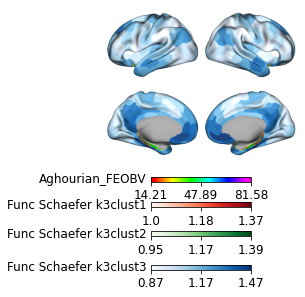

In [33]:
# mask the medial wall first 
Aghourian_FEOBV_fslr_lh_data[np.logical_not(med_lh_data)] = 0
Aghourian_FEOBV_fslr_rh_data[np.logical_not(med_rh_data)] = 0

# now plot the data
p = Plot(surf_lh=lh, surf_rh=rh)
p.add_layer({'left': Aghourian_FEOBV_fslr_lh_data, 'right': Aghourian_FEOBV_fslr_rh_data}, cmap='gist_rainbow', cbar_label='Aghourian_FEOBV')
p.add_layer({'left': k3clust1_lh, 'right': k3clust1_rh}, cmap='Reds', cbar_label='Func Schaefer k3clust1')
p.add_layer({'left': k3clust2_lh, 'right': k3clust2_rh}, cmap='Greens', cbar_label='Func Schaefer k3clust2')
p.add_layer({'left': k3clust3_lh, 'right': k3clust3_rh}, cmap='Blues', cbar_label='Func Schaefer k3clust3')
kws = {'fontsize': 12}
fig = p.build(cbar_kws=kws)
fig.show()

/tmp/ipykernel_48557/3664056438.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


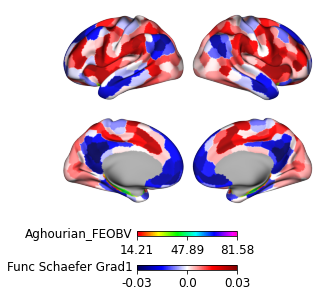

In [38]:
# mask the medial wall first 
Aghourian_FEOBV_fslr_lh_data[np.logical_not(med_lh_data)] = 0
Aghourian_FEOBV_fslr_rh_data[np.logical_not(med_rh_data)] = 0

# now plot the data
p = Plot(surf_lh=lh, surf_rh=rh)
p.add_layer({'left': Aghourian_FEOBV_fslr_lh_data, 'right': Aghourian_FEOBV_fslr_rh_data}, cmap='gist_rainbow', cbar_label='Aghourian_FEOBV')
p.add_layer({'left': grad1_lh, 'right': grad1_rh}, cmap='seismic', cbar_label='Func Schaefer Grad1')
kws = {'fontsize': 12}
fig = p.build(cbar_kws=kws)
fig.show()

/tmp/ipykernel_48557/2936770740.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


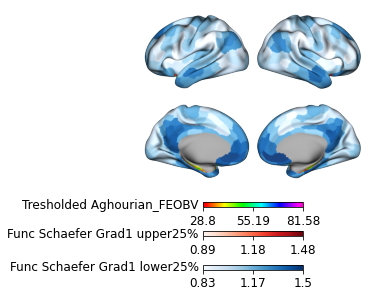

In [49]:
# mask the medial wall first 
Tr_Aghourian_FEOBV_fslr_L_data[np.logical_not(med_lh_data)] = 0
Tr_Aghourian_FEOBV_fslr_R_data[np.logical_not(med_rh_data)] = 0

# now plot the data
p = Plot(surf_lh=lh, surf_rh=rh)
p.add_layer({'left': Tr_Aghourian_FEOBV_fslr_L_data, 'right': Tr_Aghourian_FEOBV_fslr_R_data}, cmap='gist_rainbow', cbar_label='Tresholded Aghourian_FEOBV')
p.add_layer({'left': grad1_upper25_lh, 'right': grad1_upper25_rh}, cmap='Reds', cbar_label='Func Schaefer Grad1 upper25%')
p.add_layer({'left': grad1_lower25_lh, 'right': grad1_lower25_rh}, cmap='Blues', cbar_label='Func Schaefer Grad1 lower25%')
kws = {'fontsize': 12}
fig = p.build(cbar_kws=kws)
fig.show()

In [72]:
import numpy as np

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [73]:
norm_Tr_Aghourian_FEOBV_fslr_L_data = NormalizeData(Tr_Aghourian_FEOBV_fslr_L_data)
norm_Tr_Aghourian_FEOBV_fslr_R_data = NormalizeData(Tr_Aghourian_FEOBV_fslr_R_data)
norm_grad1_upper25_lh = NormalizeData(grad1_upper25_lh)
norm_grad1_upper25_rh = NormalizeData(grad1_upper25_rh)
norm_grad1_lower25_lh = NormalizeData(grad1_lower25_lh)
norm_grad1_lower25_rh = NormalizeData(grad1_lower25_rh)

In [75]:
grad1_upper25_lh

array([0.95201653, 1.1768702 , 1.2600524 , ..., 1.1214395 , 1.1214395 ,
       1.1214395 ], dtype=float32)

/tmp/ipykernel_48557/2845822576.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


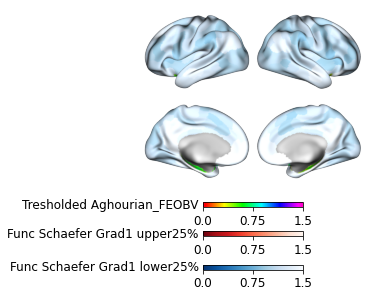

In [76]:
# mask the medial wall first 
norm_Tr_Aghourian_FEOBV_fslr_L_data[np.logical_not(med_lh_data)] = 0
norm_Tr_Aghourian_FEOBV_fslr_R_data[np.logical_not(med_rh_data)] = 0

# now plot the data
p = Plot(surf_lh=lh, surf_rh=rh)
# shading
lh_sulc, rh_sulc = surfaces['sulc']
p.add_layer({'left': lh_sulc, 'right': rh_sulc}, cmap='binary_r', cbar=False)

color_range = (0, 1.5)

p.add_layer({'left': norm_Tr_Aghourian_FEOBV_fslr_L_data, 'right': norm_Tr_Aghourian_FEOBV_fslr_R_data}, cmap='gist_rainbow', color_range=color_range, cbar_label='Tresholded Aghourian_FEOBV')
p.add_layer({'left': grad1_upper25_lh, 'right': grad1_upper25_rh}, cmap='Reds_r', color_range=color_range, cbar_label='Func Schaefer Grad1 upper25%')
p.add_layer({'left': grad1_lower25_lh, 'right': grad1_lower25_rh}, cmap='Blues_r', color_range=color_range, cbar_label='Func Schaefer Grad1 lower25%')
kws = {'fontsize': 12}
fig = p.build(cbar_kws=kws)
fig.show()

In [69]:
min_max_scaler = preprocessing.MinMaxScaler

In [70]:
norm_Tr_Aghourian_FEOBV_fslr_L_data = min_max_scaler.fit_transform(Tr_Aghourian_FEOBV_fslr_L_data)
norm_Tr_Aghourian_FEOBV_fslr_R_data = NormalizeData(Tr_Aghourian_FEOBV_fslr_R_data)
norm_grad1_upper25_lh = NormalizeData(grad1_upper25_lh)
norm_grad1_upper25_rh = NormalizeData(grad1_upper25_rh)
norm_grad1_lower25_lh = NormalizeData(grad1_lower25_lh)
norm_grad1_lower25_rh = NormalizeData(grad1_lower25_rh)

TypeError: fit_transform() missing 1 required positional argument: 'X'

In [71]:
Tr_Aghourian_FEOBV_fslr_L_data.type

AttributeError: 'numpy.ndarray' object has no attribute 'type'